# <center>DIAMOND PRICE PREDICTION

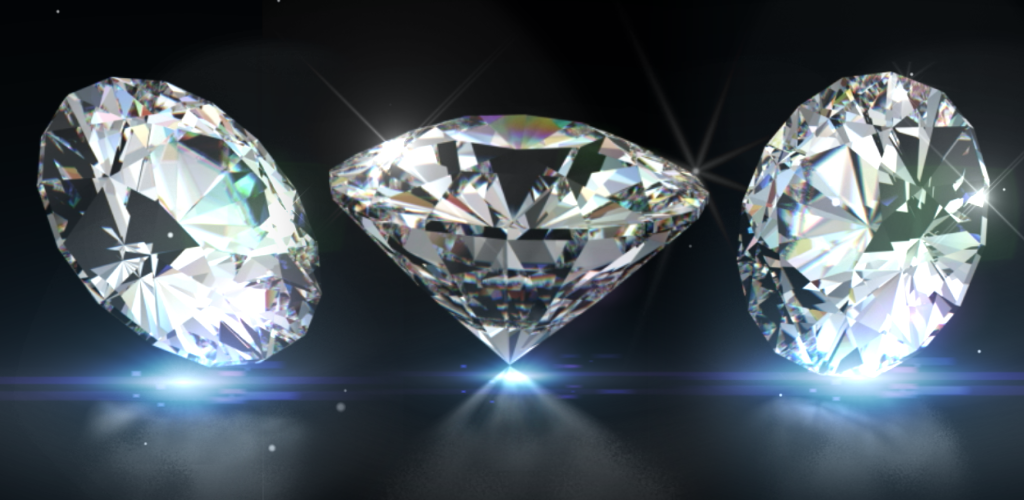

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv("diamonds  NEW.csv")

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [4]:
data.tail()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
53935,0.72,b'Ideal',b'D',b'SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,b'Good',b'D',b'SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,b'Very Good',b'D',b'SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,b'Premium',b'H',b'SI2',61.0,58.0,2757.0,6.15,6.12,3.74
53939,0.75,b'Ideal',b'D',b'SI2',62.2,55.0,2757.0,5.83,5.87,3.64


In [5]:
data.sample()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
22549,1.5,b'Very Good',b'H',b'VS1',63.4,56.0,10584.0,7.29,7.25,4.61


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
'x',53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
'y',53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
'z',53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [8]:
data.shape

(53940, 10)

In [9]:
data.duplicated().sum()

146

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

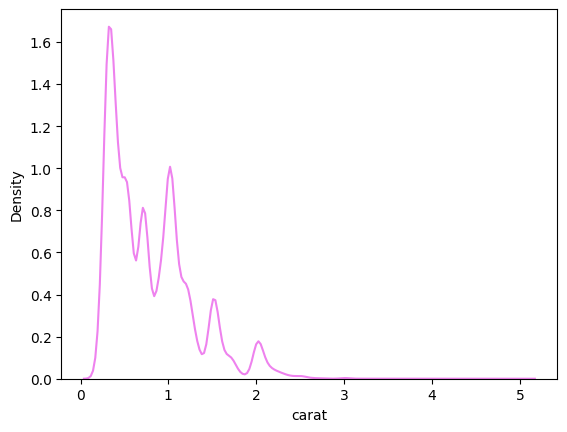

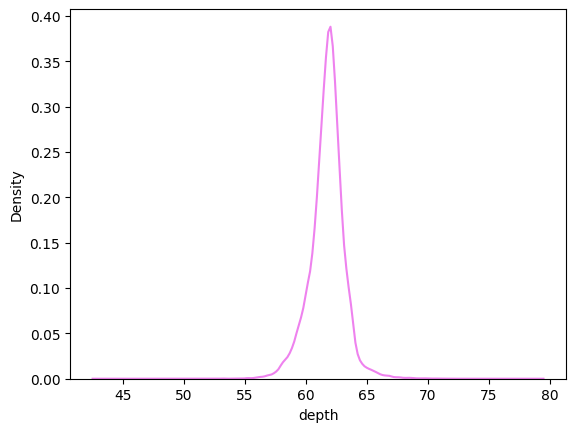

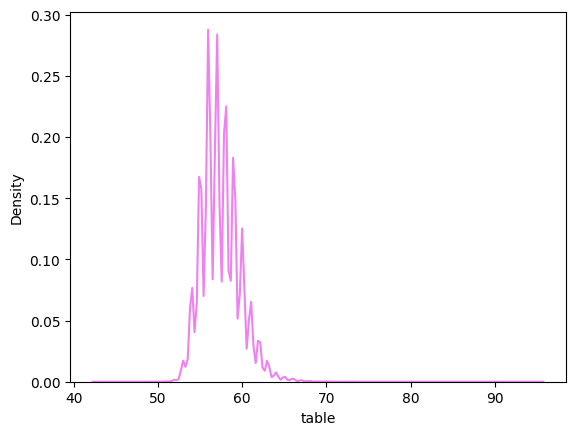

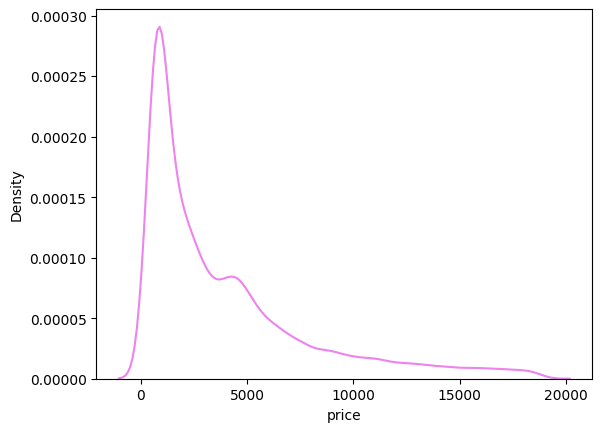

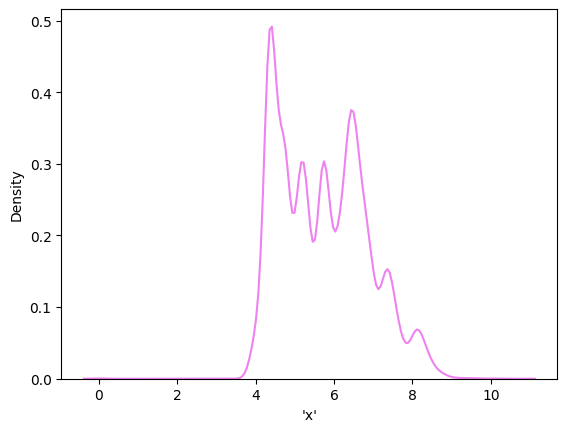

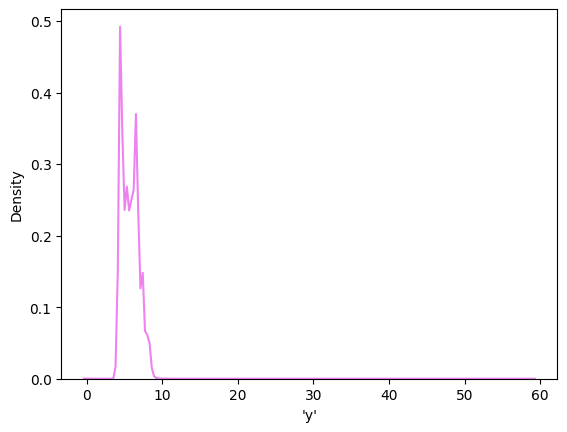

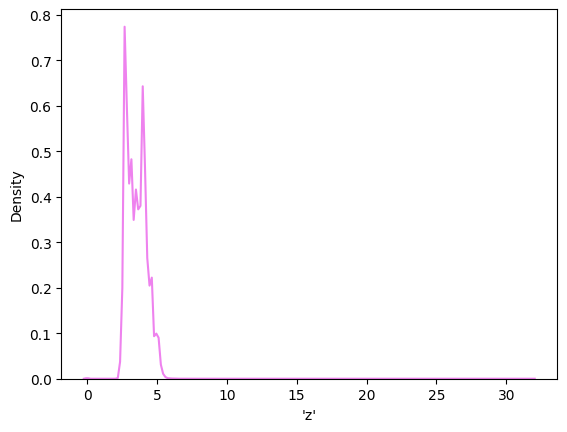

In [12]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.kdeplot(x=data[i],color="violet")
        plt.show()

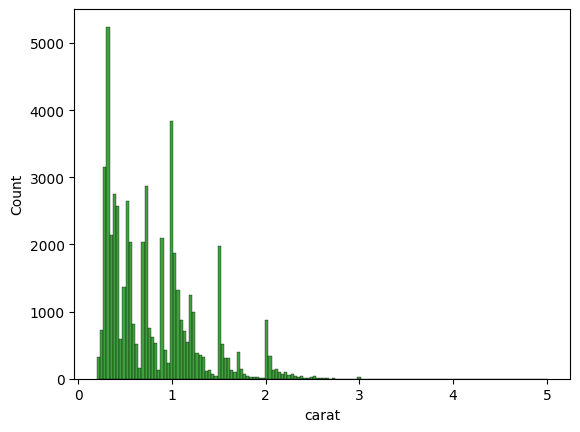

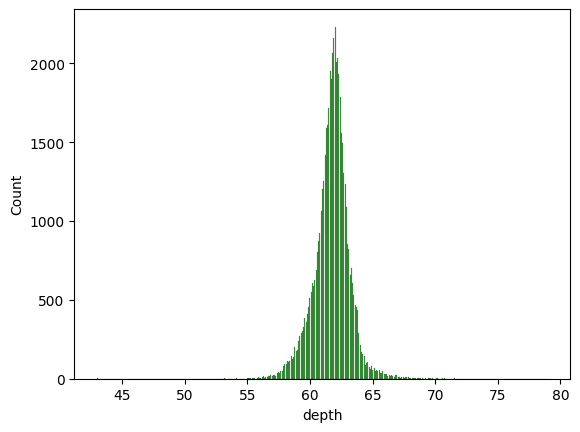

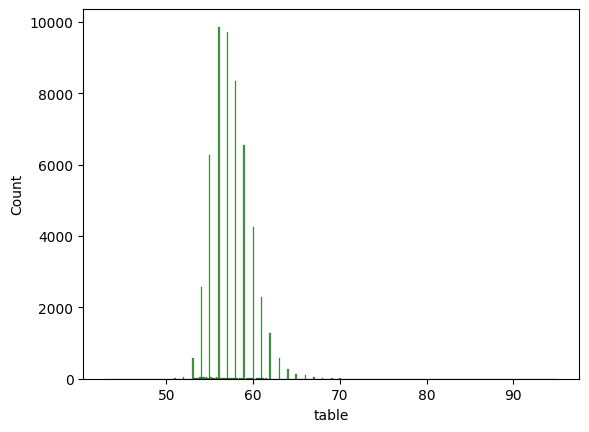

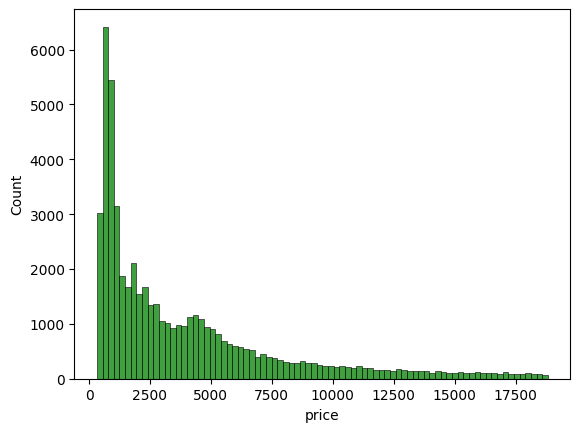

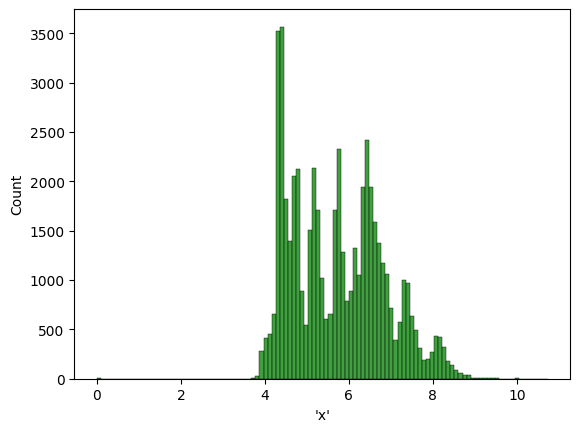

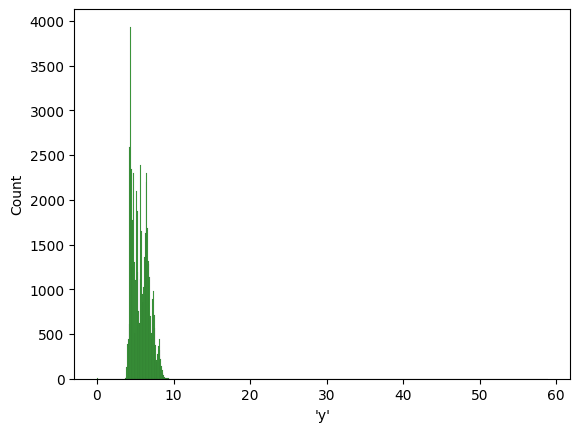

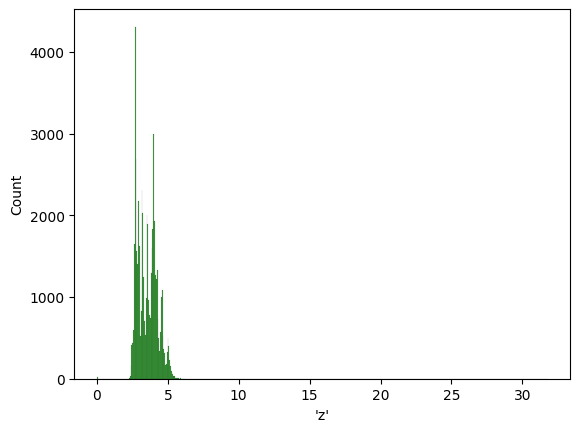

In [13]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.histplot(x=data[i],color="green")
        plt.show()

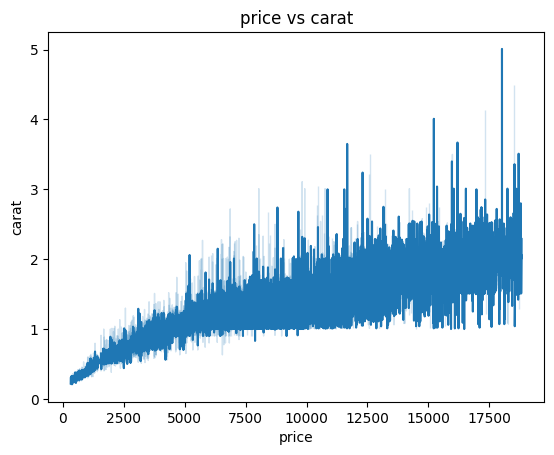

In [14]:
sns.lineplot('price','carat', data=data)
plt.title('price vs carat')
plt.show()

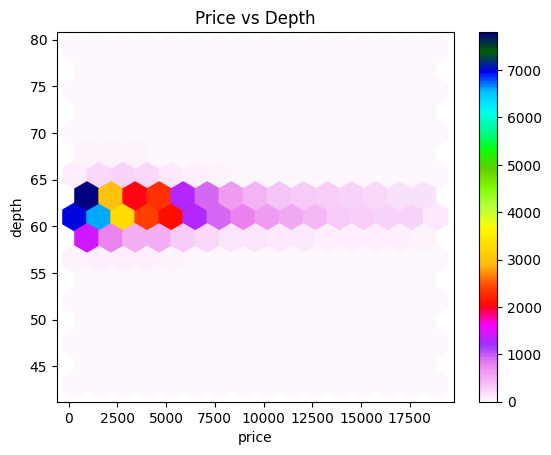

In [15]:
data.plot.hexbin("price","depth",gridsize=15,cmap="gist_ncar_r");
plt.title("Price vs Depth");

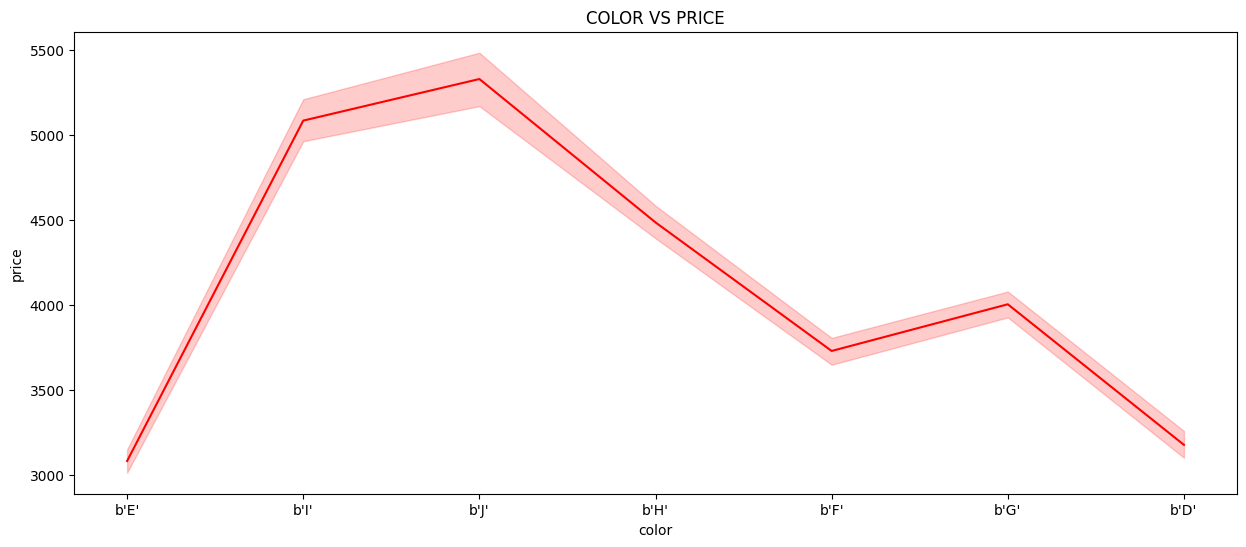

In [16]:
plt.figure(figsize=(15,6))
plt.title('COLOR VS PRICE')
sns.lineplot(x='color', y='price', data=data,color="red");

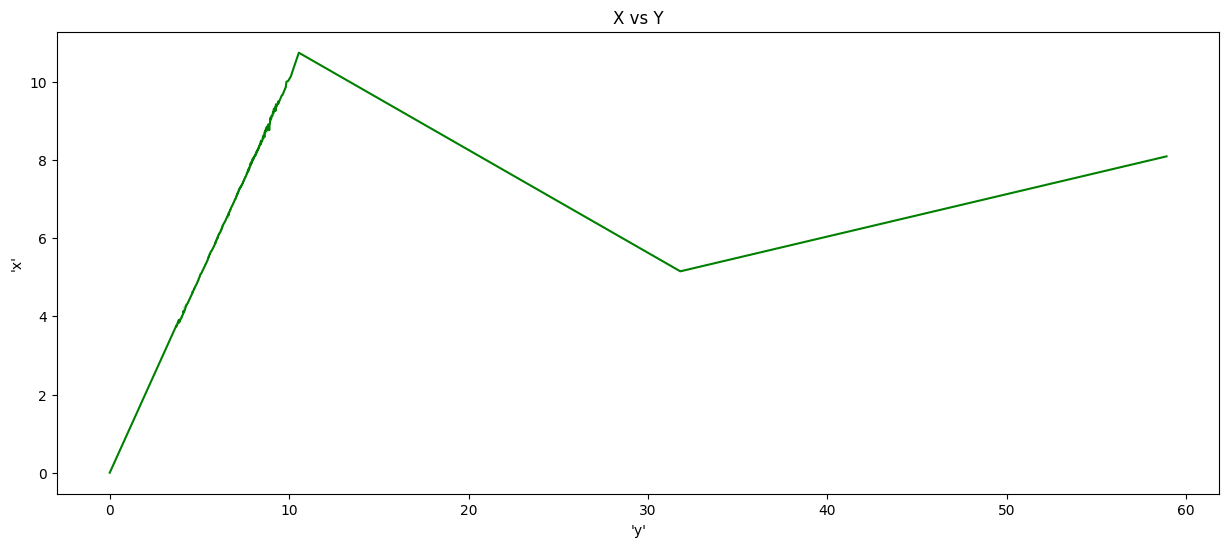

In [17]:
plt.figure(figsize=(15,6))
plt.title('X vs Y')
sns.lineplot(x="'y'", y="'x'", data=data,color="green");

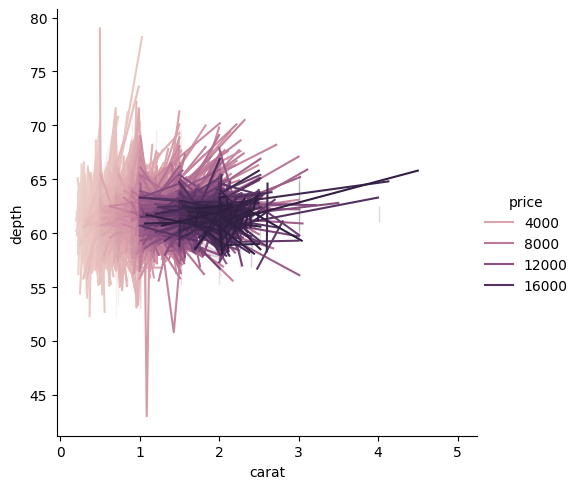

In [18]:
sns.relplot(data = data, x = 'carat', y = 'depth', hue = 'price',kind="line");

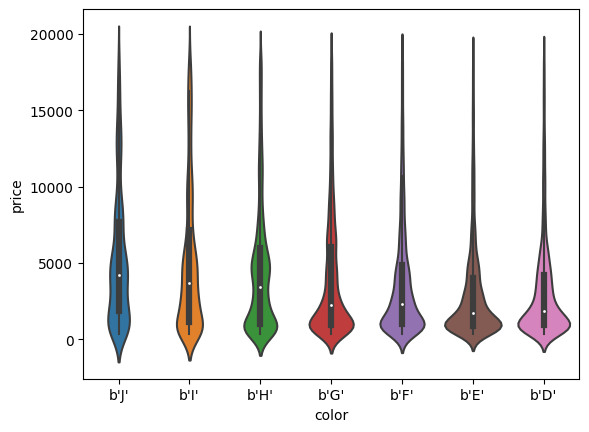

In [19]:
sns.violinplot(x="color",y="price",data=data.sort_values(by="color",ascending=False))
plt.style.use("fivethirtyeight")
plt.show()

In [20]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

# FINDING OUTLIERS

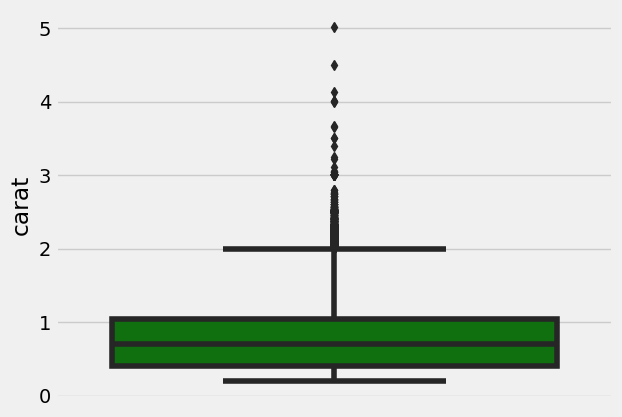

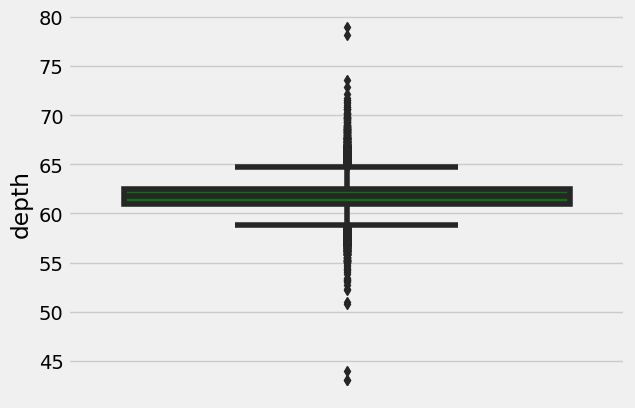

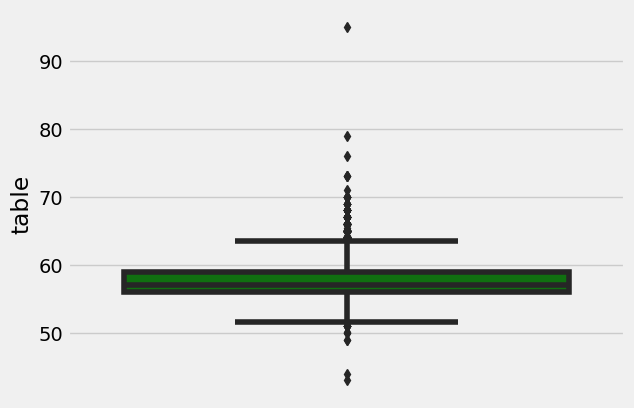

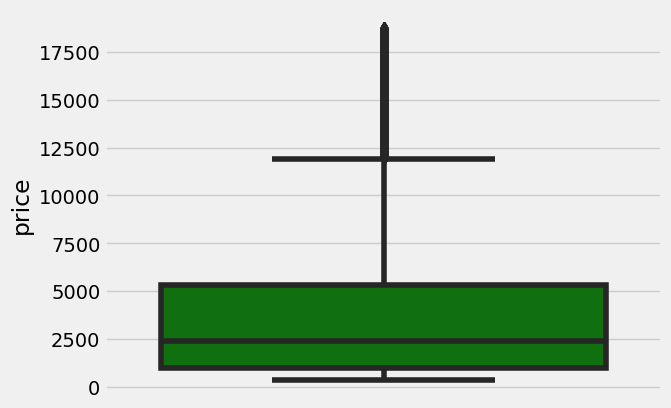

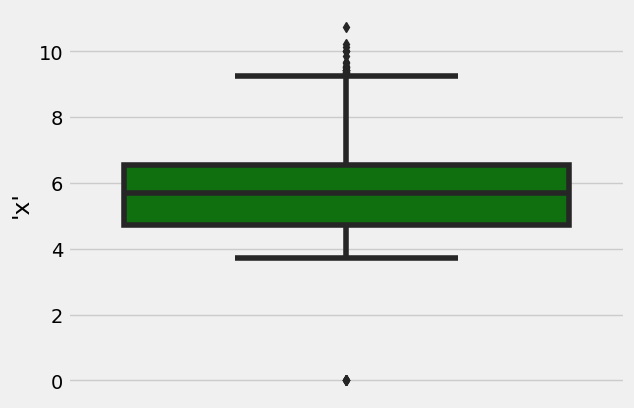

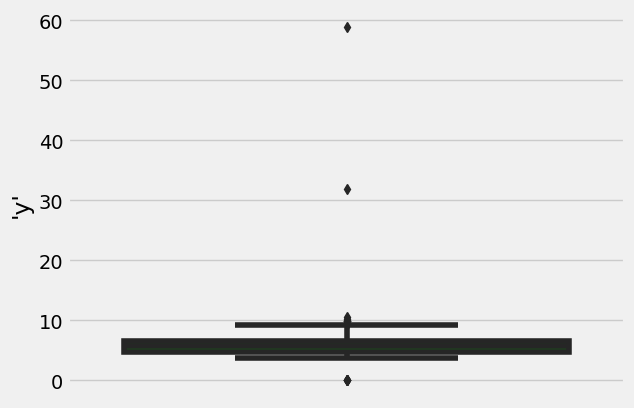

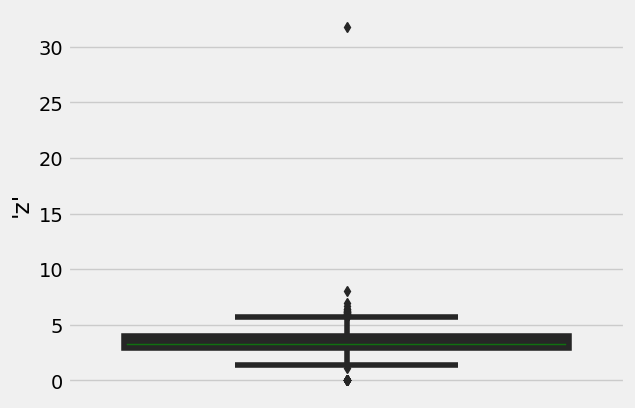

In [21]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i],color="green")
        plt.show()

# REMOVE OUTLIERS

In [22]:
def outer_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR =Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [23]:
for column in data.columns:
    if data[column].dtype != 'object':
        UL,LL=outer_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])

In [24]:
data.dropna(inplace=True)

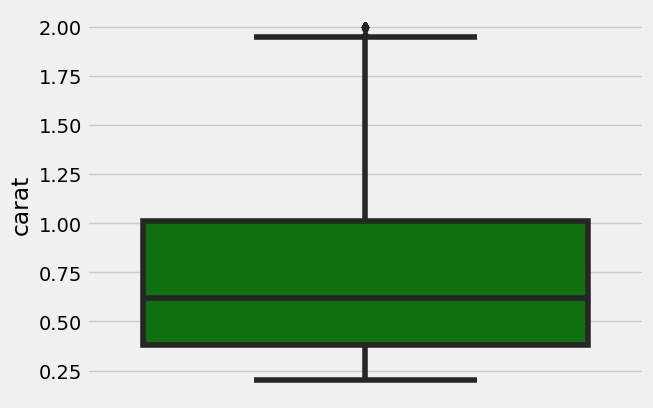

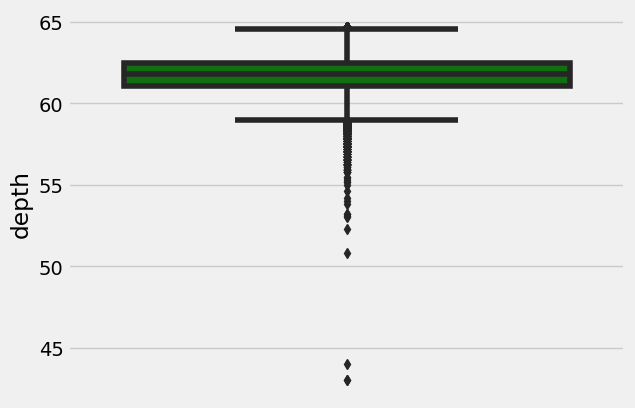

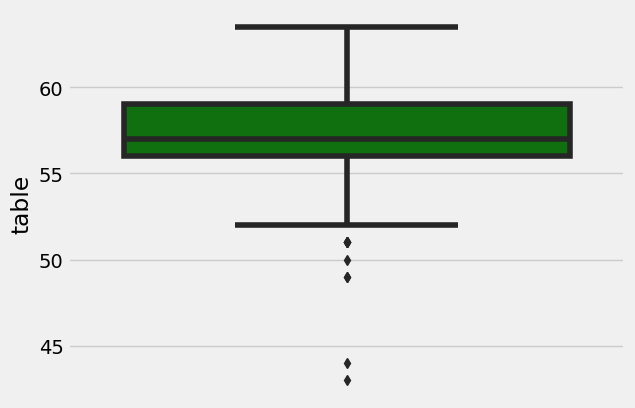

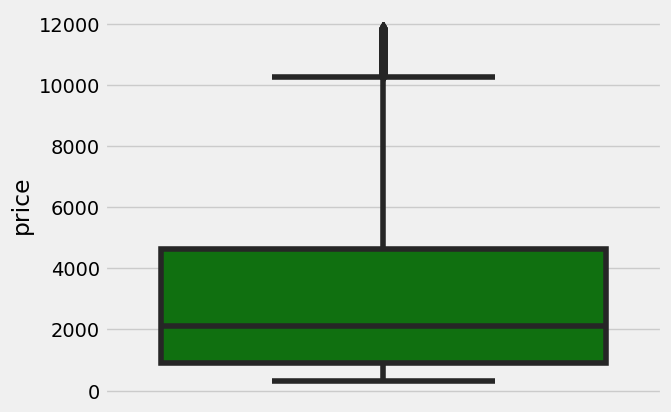

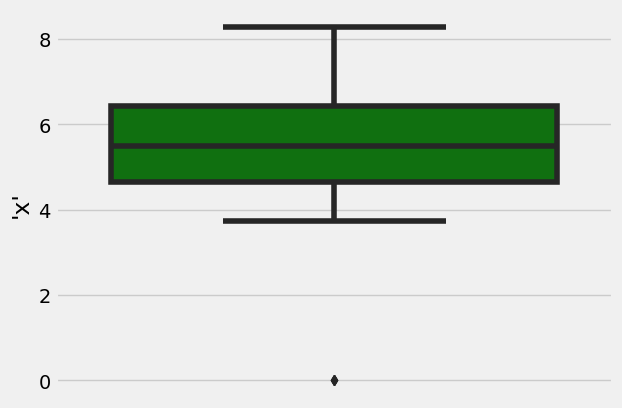

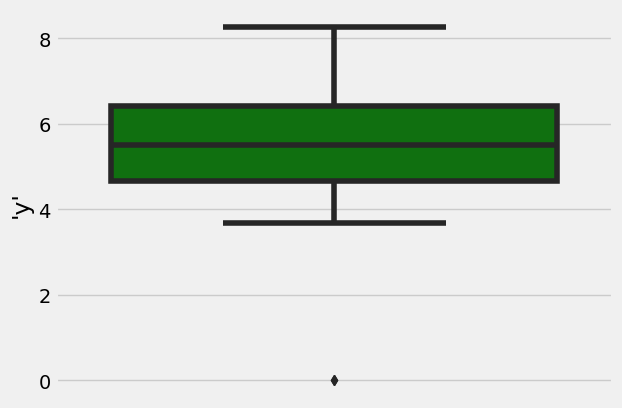

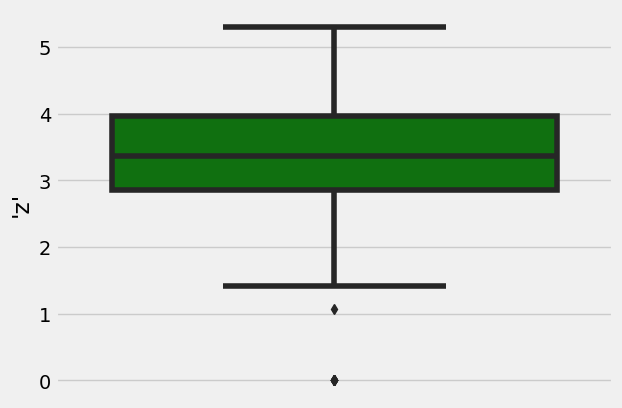

In [25]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i],color="green")
        plt.show()

# Label encoding the categorical columns

In [26]:
le=LabelEncoder()

In [27]:
data['color']=le.fit_transform(data['color'])
data['clarity']=le.fit_transform(data['clarity'])
data['cut']=le.fit_transform(data['cut'])

In [28]:
data

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


# Checking the correlation with the target 'price'

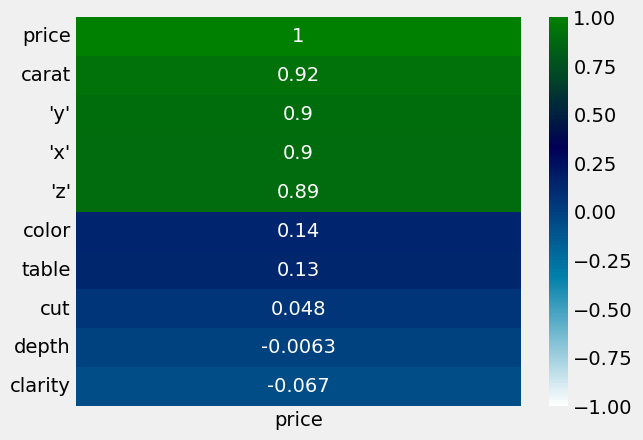

In [29]:
sns.heatmap(data.corr()[['price']].sort_values(by='price',ascending=False),vmin=-1,vmax=1,annot=True,cmap="ocean_r");

In [30]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

In [31]:
x=data[["carat", "cut", "color", "clarity", "depth", "table","'x'","'y'","'z'"]].values

In [32]:
y=data[["price"]].values

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model Buliding

In [34]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [35]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  911.4871566012891
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  911.9696063684898
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  715.3183427038006
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1003.5348526577178
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  584.1118820506983
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  572.1846532631187
***********************************

# Selecting Random forest regressor as it is having best metrics

In [36]:
model=RandomForestRegressor()

In [37]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
y_pred=model.predict(x)

In [39]:
Output=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
Output

,ACTUAL,PREDICTED
0,326.0,423.48
1,326.0,351.36
2,334.0,385.88
3,335.0,409.91
4,336.0,356.49
...,...,...
48612,2757.0,2762.24
48613,2757.0,2774.47
48614,2757.0,2733.23
48615,2757.0,2783.25


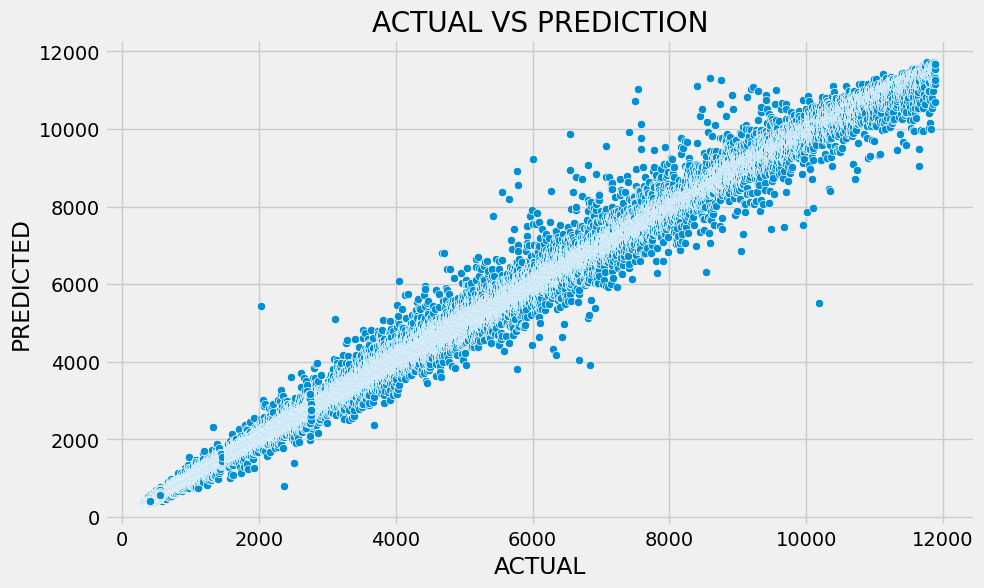

In [40]:
plt.figure(figsize=(10,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=Output,x='ACTUAL',y='PREDICTED');